---

## EDA Parte 1.

Empezamos el proyecto con un análisis exploratorio de datos (EDA).

En esta etapa del proyecto, vamos a conocer la estructura del dataset y nuestros datos, los valores faltantes y las caracterísiticas de cada columna.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Cargamos los datos.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# Mostramos las primeras filas del dataset de entrenamiento.
train_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
train_data = train_data.drop('Id', axis = 1)

**SalePrice**: Precio de venta de la propiedad en dólares. Esta es la variable target a predecir.  
**MSSubClass**: La clase del edificio.  
**MSZoning**: Clasificación general de zonificación.  
**LotFrontage**: Metros lineales de calle conectados a la propiedad.  
**LotArea**: Tamaño del terreno en pies cuadrados.  
**Street**: Tipo de acceso por carretera.  
**Alley**: Tipo de acceso por callejón.  
**LotShape**: Forma general de la propiedad.  
**LandContour**: Nivelación del terreno.  
**Utilities**: Tipo de servicios disponibles.  
**LotConfig**: Configuración del lote.  
**LandSlope**: Pendiente del terreno.  
**Neighborhood**: Ubicaciones físicas dentro de los límites de la ciudad de Ames.  
**Condition1**: Proximidad a carretera principal o ferrocarril.  
**Condition2**: Proximidad a carretera principal o ferrocarril (si existe una segunda).  
**BldgType**: Tipo de vivienda.  
**HouseStyle**: Estilo de la vivienda.  
**OverallQual**: Calidad general del material y acabado.  
**OverallCond**: Calificación de la condición general.  
**YearBuilt**: Fecha de construcción original.  
**YearRemodAdd**: Fecha de remodelación.  
**RoofStyle**: Tipo de techo.  
**RoofMatl**: Material del techo.  
**Exterior1st**: Revestimiento exterior de la casa.  
**Exterior2nd**: Revestimiento exterior de la casa (si hay más de un material).  
**MasVnrType**: Tipo de revestimiento de mampostería.  
**MasVnrArea**: Área de revestimiento de mampostería en pies cuadrados.  
**ExterQual**: Calidad del material exterior.  
**ExterCond**: Condición actual del material exterior.  
**Foundation**: Tipo de cimentación.  
**BsmtQual**: Altura del sótano.  
**BsmtCond**: Condición general del sótano.  
**BsmtExposure**: Paredes del sótano a nivel de jardín o salida.  
**BsmtFinType1**: Calidad del área terminada del sótano.  
**BsmtFinSF1**: Metros cuadrados terminados tipo 1.  
**BsmtFinType2**: Calidad de la segunda área terminada (si es que existe).  
**BsmtFinSF2**: Metros cuadrados terminados tipo 2.  
**BsmtUnfS**F: Metros cuadrados sin terminar del sótano.  
**TotalBsmtSF**: Metros cuadrados totales del sótano.  
**Heating**: Tipo de calefacción.  
**HeatingQC**: Calidad y condición de la calefacción.  
**CentralAir**: Aire acondicionado central.  
**Electrical**: Sistema eléctrico.  
**1stFlrSF**: Metros cuadrados del primer piso.  
**2ndFlrSF**: Metros cuadrados del segundo piso.  
**LowQualFinSF**: Metros cuadrados terminados de baja calidad (todas los pisos)  
**GrLivArea**: Área habitable sobre el nivel del suelo en pies cuadrados.  
**BsmtFullBath**: Baños completos del sótano.  
**BsmtHalfBath**: Medios baños del sótano.  
**FullBath**: Baños completos sobre el nivel del suelo.  
**HalfBath**: Medios baños sobre el nivel del suelo.  
**Bedroom**: Número de dormitorios sobre el nivel del sótano.  
**Kitchen**: Número de cocinas.  
**KitchenQual**: Calidad de la cocina.  
**TotRmsAbvGrd**: Total de habitaciones sobre el nivel del suelo (no incluye baños).  
**Functional**: Calificación de la funcionalidad de la casa.  
**Fireplaces**: Número de chimeneas.  
**FireplaceQu**: Calidad de la chimenea.  
**GarageType**: Ubicación del gareje.  
**GarageQual**: Calidad del garaje.  
**PavedDrive**: Entrada pavimentada.  
**WoodDeckSF**: Área de la terraza de madera en pies cuadrados.  
**OpenPorchSF**: Área del porche abierto en pies cuadrados.  
**EnclosedPorch**: Área del porche cerrado en pies cuadrados.  
**3SsnPorch**: Área del porche de tres estaciones en pies cuadrados.  
**ScreenPorch**: Área del porche con mosquitero en pies cuadrados.  
**PoolArea**: Área de la piscina en pies cuadrados.  
**PoolQC**: Calidad de la piscina.  
**Fence**: Calidad de la cerca.  
**MiscFeature**: Característica miscelánea no cubierta en otras categorías.  
**MiscVal**: Valor de la característica miscelánea en dólares.  
**MoSold**: Mes en que se vendió la propiedad.  
**YrSold**: Año en que se vendió la propiedad.  
**SaleType**: Tipo de venta.  
**SaleCondition**: Condición de la venta.  

In [5]:
print(f'Dimensiones del dataset de entrenamiento: {train_data.shape[0]} filas, {train_data.shape[1]} columnas.')

Dimensiones del dataset de entrenamiento: 1460 filas, 80 columnas.


In [6]:
print(f'Dimensiones del dataset de prueba: {test_data.shape[0]} filas, {test_data.shape[1]} columnas.')

Dimensiones del dataset de prueba: 1459 filas, 80 columnas.


Vemos que el dataset de entrenamiento tiene 1460 filas y 81 columnas. 

*El dataset de entrenamiento tiene una columna más, esta columna es la variable target a predecir.*

In [7]:
# Resumen estadístico de las variables numéricas.
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

Vemos que, al ser un dataset con demasiadas columnas, nos abrevia algunas de ellas. Para solucionar esto, vamos a ver solo las columnas que contienen valores nulos.

In [9]:
# Mostramos solo las columnas con valores nulos y el número de valores faltantes.
columnas_nulas = train_data.isnull().sum()
columnas_nulas = columnas_nulas[columnas_nulas > 0]

print(columnas_nulas)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Sabemos que nuestro dataset de entrenamiento tiene 1460 registros, y vemos que algunas de las columnas contienen la mayoría de sus datos nulos. Vamos a trabajar esto con técnicas de imputación para poder entrenar el modelo de la manera más óptima.

In [10]:
# Resumen de la estructura de datos.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Al igual que con .isnull(), .info() nos abrevia columnas debido a su cantidad, nosotros necesitamos saber cuales columnas son categóricas y cuales son numéricas, de esta forma vamos a saber si necesitamos pasar alguna columna categórica a numérica para entrenar el modelo.

In [11]:
# Vemos las columnas categóricas y numéricas del dataset.
columnas_categoricas = train_data.select_dtypes(include = ['object']).columns
columnas_numericas = train_data.select_dtypes(include = ['int64', 'float64']).columns

In [12]:
print(f'Columnas categóricas: \n{columnas_categoricas}\n')
print(f'Columnas numéricas: \n{columnas_numericas}\n')

Columnas categóricas: 
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Columnas numéricas: 
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBat

---

## Valores nulos.

La siguiente etapa del proyecto es trabajar los valores nulos, usando técnicas de imputación para las columnas con pocos valores faltantes y analizando qué medidas tomar con las columnas con muchos valores faltantes.

**Columnas con mayor cantidad de datos faltantes (más del 50%):**

Alley, FireplaceQu, PoolQC, Fence, MiscFeature

Estas columnas tienen un porcentaje alto de valores faltantes. Para estos casos, hay dos enfoques comunes: eliminar las columnas si es que su información es menos relevante  o imputar un valor para representar la ausencia (como "Sin info" o "Sin cercado" para **Fance**), dependiendo del contexto.

**Columnas con valores nulos de moderados a bajos (menos del 10%):**

LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond.

Para abordar el problema con estas columnas podriamos:

* Imputar con una mediana central, como la mediana, para valores numéricos: (LotFrontage, MasVnrArea).
* Imputar el valor más frecuente o una categoría especial para valores categóricos (MasVnrType, Electrical, etc).

**Columna 'FireplaceQu' (Casi el 50% de valores nulos):**

Para esta columna también vamos a trabajar una técnica de imputacion igual a la que vamos a realizar en las variables de garage.

### Trabajamos las columnas con menos del 10% de valores faltantes y la columna 'FireplaceQu'.

La primer columna que vamos a trabajar es 'LotFrontage' en la que vamos a usar la mediana por barrio ('Neighborhood'), ya que el tamaño de los lotes suele ser similar dentro de la misma área.

In [13]:
# Imputación de 'LotFrontage' usando la mediana por 'Neighborhood'.
train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

Seguimos con las columnas 'MasVnrType' y 'MasVnrArea'.

MasVnrType es una columna categórica (tipo de revestimiento de mampostería) y MasVnrArea es numérica.

Para **MasVnrType** vamos a usar "None" para indicar la falta de mampostería, y en **MasVnrArea** vamos a usar "0" ya que, como en MasVnrType, puede no haber mampostería.

In [14]:
# Imputación de 'MasVnrType' y 'MasVnrArea'.
train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)

Las columnas 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' nos muestran características específicas del sótano (calidad, condición, exposición, tipo de acabado) y seguramente tienen valores nulos porque hay propiedades que no tienen sótano.

Para trabajar estas columnas, vamos a asignar una etiqueta 'No Basement' para mostrar de manera categórica que la propiedad no tiene sótano.

In [15]:
# Imputación de características del sótano: 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
caracteristicas_sotano = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for caracteristica in caracteristicas_sotano:
    train_data[caracteristica] = train_data[caracteristica].fillna('No Basement')

Para trabajar la columna 'Electrical' vamos a rellenar usando la moda (el valor más frecuente), ya que esta columna solo tiene un valor faltante.

In [16]:
# Imputación de 'Electrical' usando la moda.
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])

Las columnas 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond' están relacionadas con el garaje y, como con el sótano, los valores nulos nos indican que la casa no posee garage.

En **GarageType**, **GarageFinish**, **GarageQual**, **GarageCond**, vamos a imputar 'No Garage' para indicar que la casa no tiene garage.

Para **GarageYrBlt**, vamos a imputar 0 para indicar el año de constricción.

In [17]:
# Imputación de características del garage: 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'
caracteristicas_garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for caracteristica in caracteristicas_garage:
    train_data[caracteristica] = train_data[caracteristica].fillna('No Garage')

In [18]:
# Para 'GarageYrBlt', vamos a llenar los valores faltantes con 0.
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(0)

Como hicimos anteriormente con las variables del garage, para trabajar **FireplaceQu** vamos a imputar 'No Fire Place' para indicar que la casa no tiene chimenea.

In [19]:
# Imputación en la columna 'FireplaceQu'.
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('No Fire Place')

Por último, mostramos solo las columnas con valores nulos y el número de valores faltantes.

In [20]:
columnas_nulas = train_data.isnull().sum()
columnas_nulas = columnas_nulas[columnas_nulas > 0]

print(columnas_nulas)

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


Vemos que solo nos quedan las columnas con 50% o más de valores faltantes, ahora sabemos que las imputaciones trabajadas anteriormente se realizaron correctamente.

### Trabajamos las columnas con más del 50% de valores faltantes.

Las columnas 'Alley', 'PoolQC', 'Fence', y 'MiscFeature' tienen más del 80% de datos faltantes. Aunque alguna podría aportar buena información al modelo, vamos a eliminarlas por la cantidad significativa de datos faltantes.

In [21]:
# Eliminamos las columnas 'Alley', 'PoolQC', 'Fence', y 'MiscFeature'.
columnas_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
train_data = train_data.drop(columns = columnas_drop)

Verificamos que ya no hayan valores faltantes en el dataset.

In [22]:
columnas_nulas = train_data.isnull().sum()
columnas_nulas = columnas_nulas[columnas_nulas > 0]

print(columnas_nulas)

Series([], dtype: int64)


---

## Categóricas a numéricas.

Ahora que nuestro dataset no tiene valores faltantes, vamos a analizar que columnas categóricas son importantes para el entrenamiento del modelo para convertirlas a columnas numéricas.

In [23]:
# Vemos las columnas categóricas y numéricas del dataset.
columnas_categoricas = train_data.select_dtypes(include = ['object']).columns
columnas_numericas = train_data.select_dtypes(include = ['int64', 'float64']).columns

In [24]:
print(f'Columnas categóricas: \n{columnas_categoricas}\n')
print(f'Columnas numéricas: \n{columnas_numericas}\n')

Columnas categóricas: 
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Columnas numéricas: 
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbv

*Vemos que las columnas que eliminamos en la etapa de **Valores nulos** ya no estan.*

Las columnas como 'ExterQual', 'BsmtQual', 'HeatingQC' y otras describen la calidad o condición de los aspectos de las viviendas (por ejemplo, la calidad de la cocina o del sótano).

In [25]:
for col in ['ExterQual', 'BsmtQual', 'HeatingQC']:
    print(f"Valores de {col}:")
    print(train_data[col].value_counts())
    print()

Valores de ExterQual:
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

Valores de BsmtQual:
BsmtQual
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: count, dtype: int64

Valores de HeatingQC:
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64



Estas columnas tienen valores como 'Ex', 'Gd', 'TA', entre otros, que indican diferentes niveles de calidad. Para convertirlos a valores numéricos, asignamos un número a cada nivel de calidad, en donde el valor más alto representa la mejor calidad.

In [26]:
# Mapeo general para columnas de calidad y condición.
mapeo_calidad = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fire Place': 0, 'No Garage': 0, 'No Basement': 0}

# Asignamos el mapeo general a columnas relacionadas con calidad y condición.
columnas_calidad = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
                    'FireplaceQu', 'GarageQual', 'GarageCond']

for col in columnas_calidad:
    train_data[col] = train_data[col].map(mapeo_calidad)

Hacemos un mapeo específico para las columnas que no usan 'mapeo_calidad'

In [27]:
for col in ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    print(f"Valores de {col}:")
    print(train_data[col].value_counts())
    print()

Valores de BsmtExposure:
BsmtExposure
No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: count, dtype: int64

Valores de BsmtFinType1:
BsmtFinType1
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: count, dtype: int64

Valores de BsmtFinType2:
BsmtFinType2
Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: count, dtype: int64



In [28]:
for col in ['GarageFinish', 'Functional', 'PavedDrive']:
    print(f"Valores de {col}:")
    print(train_data[col].value_counts())
    print()

Valores de GarageFinish:
GarageFinish
Unf          605
RFn          422
Fin          352
No Garage     81
Name: count, dtype: int64

Valores de Functional:
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

Valores de PavedDrive:
PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64



In [29]:
mapeo_especifico = {
    'BsmtExposure': {'No Basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'GarageFinish': {'No Garage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
}

for col, mapeo_e in mapeo_especifico.items():
    train_data[col] = train_data[col].map(mapeo_e)

Las columnas **Street** y **CentralAir**, tienen solo dos opciones posibles. Estas se codifican como valores binarios: 1 para la opción más relevante y 0 para la otra.

In [30]:
for col in ['Street', 'CentralAir']:
    print(f"Valores de {col}:")
    print(train_data[col].value_counts())
    print()

Valores de Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Valores de CentralAir:
CentralAir
Y    1365
N      95
Name: count, dtype: int64



In [31]:
# Codificación binaria.
mapeo_binario = {
    'Street': {'Pave': 1, 'Grvl': 0},
    'CentralAir': {'Y': 1, 'N': 0}
}

for col, mapeo_b in mapeo_binario.items():
    train_data[col] = train_data[col].map(mapeo_b)

Para las columnas que no siguen un orden claro y tienen varias categorías sin una jerarquía definida (como **MSZoning**, **Neighborhood**, **BldgType**), vamos a usar la codificación **One-Hot**. Esto va a generar nuevas columnas binarias para cada categoría única, sin asumir ninguna relación ordinal.

In [32]:
# Codificación One-Hot.
columnas_nomilanes = ['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                      'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
                      'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 
                      'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

train_data = pd.get_dummies(train_data, columns = columnas_nomilanes, drop_first = True)

# Convertimos las columnas booleanas en binarias.
train_data[train_data.select_dtypes(include = 'bool').columns] = train_data.select_dtypes(include = 'bool').astype(int)

Vemos el resultado final del dataset después de trabajar todas las columnas categóricas.

In [33]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1,6,8,1976,1976,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

Por último, verificamos que ya no hayan columnas categóricas usando la variable que contiene las columnas categóricas que creamos con anterioridad.

In [34]:
# Vemos las columnas categóricas del dataset.
columnas_categoricas = train_data.select_dtypes(include = ['object']).columns

In [35]:
print(f'Columnas categóricas: \n{columnas_categoricas}')

Columnas categóricas: 
Index([], dtype='object')


Con esto concluimos los trabajos sobre el dataset para entregarle los datos al modelo. Como última etapa antes de entrenar el modelo, vamos a hacer un análisis de datos.

*Nota importante.*

¿Por qué no usamos otras técnicas automáticas de transformación?

1. Codificación automática de scikit-learn.

Scikit-learn ofrece transformadores como **LabelEncoder**, **OrdinalEncoder** y **OneHotEncoder**, pero estos no se adaptan bien a las necesidades específicas de este proyecto, especialmente cuando hicimos imputaciones personalizadas en las variables categóricas.

2. Necesidad de personalización.

Los mapeos que hicimos son más personalizables y nos dejan manejar de manera explícita las categorías imputadas. Usamos un enfoque más intuitivo para que los valores imputados como 'No Garage' no se confundan con los valores válidos de la columna (por ejemplo, "Unf" o "Fin" en GarageFinish)

---

## Análisis de datos.

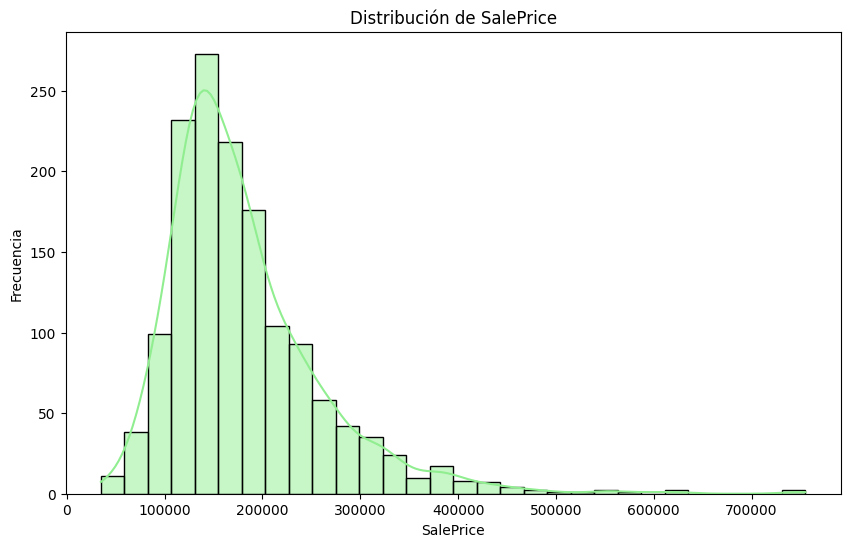

In [36]:
plt.figure(figsize = (10, 6))
sns.histplot(train_data['SalePrice'], kde = True, bins = 30, color = 'lightgreen')
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')

plt.show()

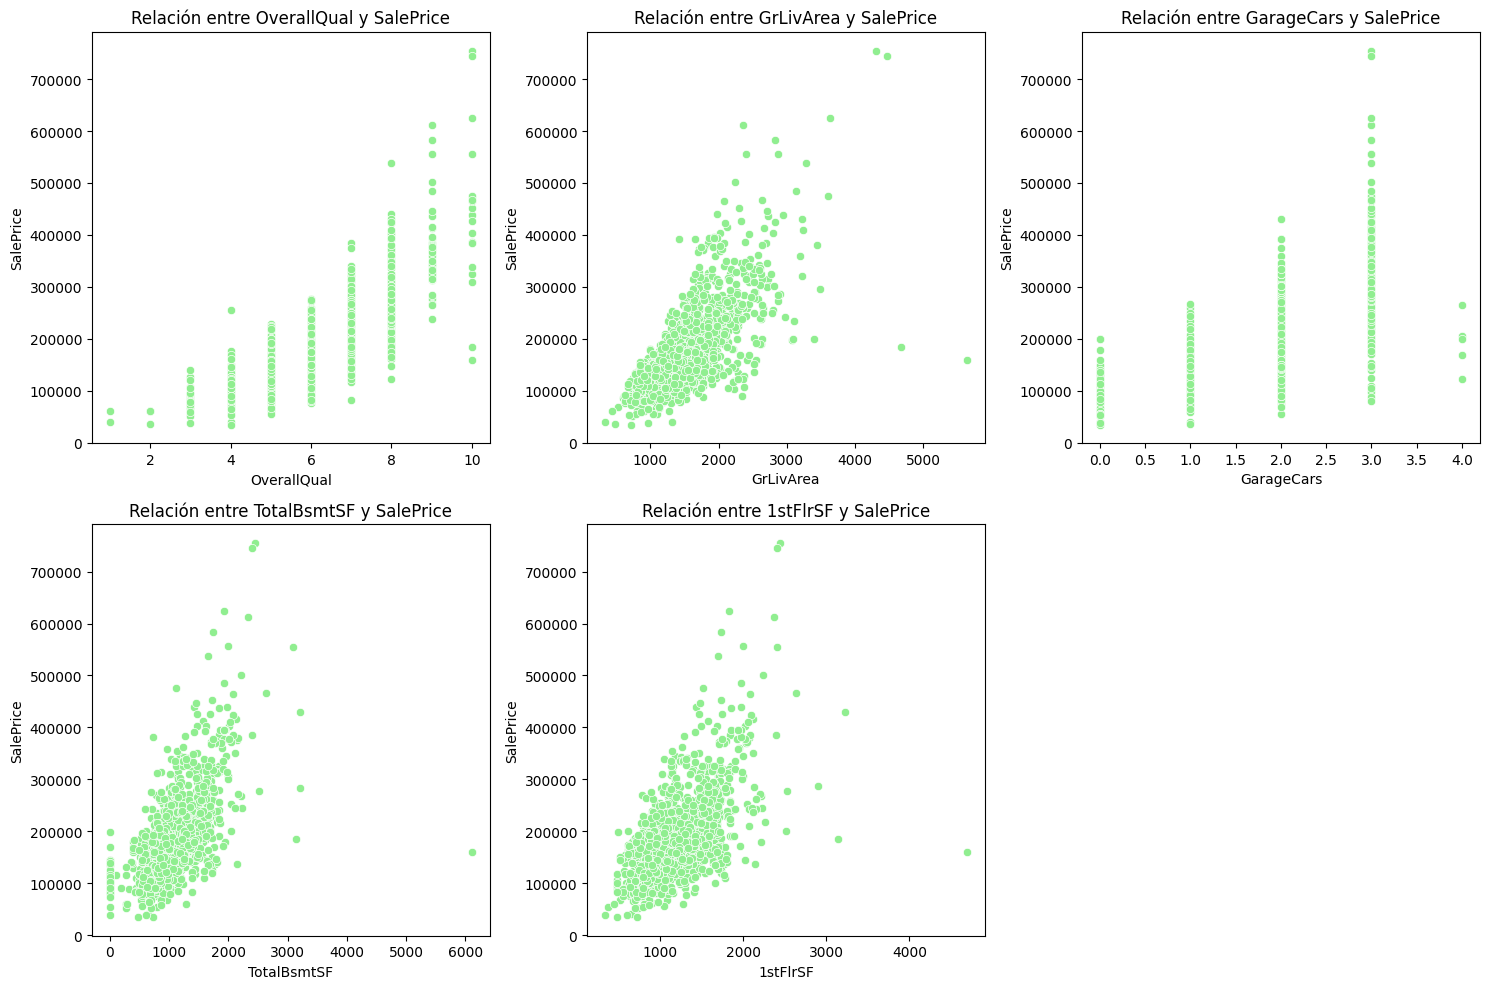

In [44]:
cols_numericas = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']

plt.figure(figsize = (15, 10))

for i, col in enumerate(cols_numericas, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data = train_data, x = col, y = 'SalePrice', color = 'lightgreen')
    plt.title(f'Relación entre {col} y SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

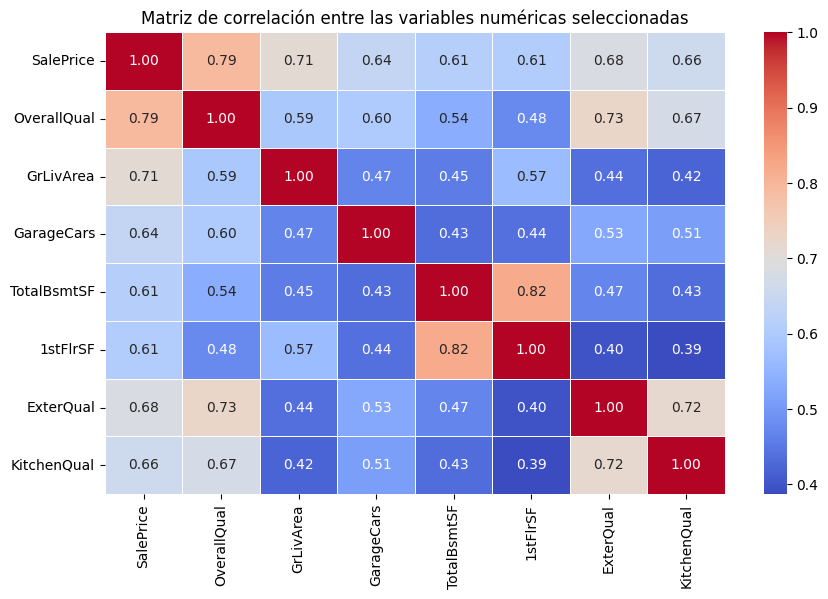

In [46]:
columnas_correlacion = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
                        'ExterQual', 'KitchenQual']

plt.figure(figsize = (10, 6))
matriz_de_correlacion = train_data[columnas_correlacion].corr()
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Matriz de correlación entre las variables numéricas seleccionadas')

plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_1036\3612605925.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = col, palette = 'Set2')
C:\Users\rodri\AppData\Local\Temp\ipykernel_1036\3612605925.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = col, palette = 'Set2')
C:\Users\rodri\AppData\Local\Temp\ipykernel_1036\3612605925.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_data, x = col, palette = 'Set2')
C:\Users\rodri\AppData\Local\Temp\ipykernel_1036\3612605925.py:7: F

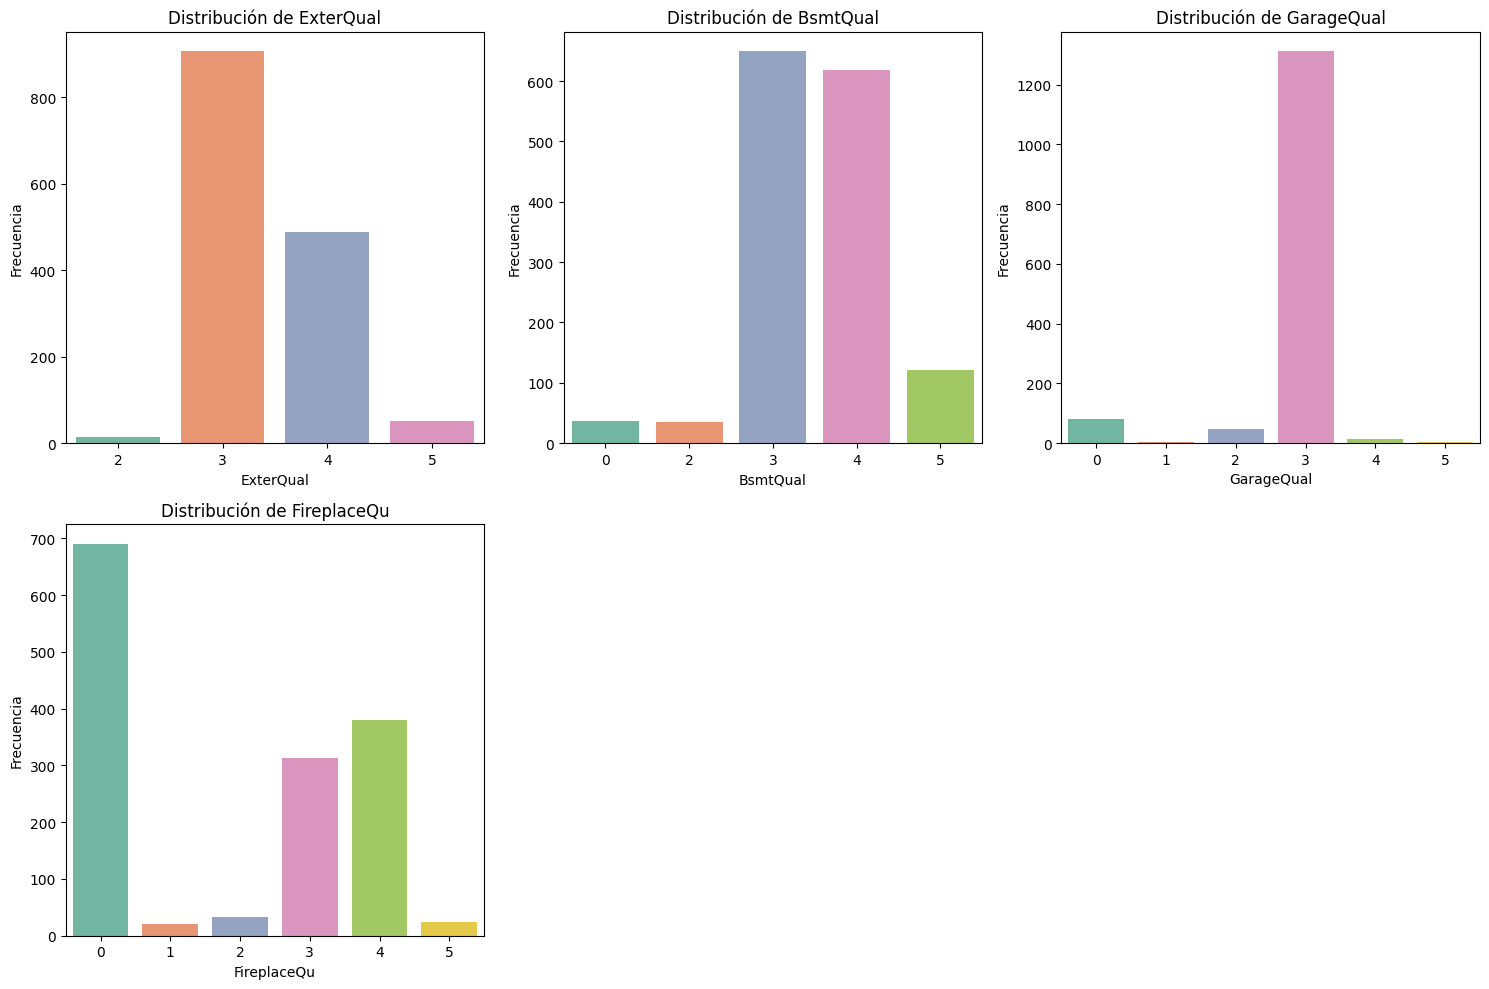

In [51]:
cols_categoricas = ['ExterQual', 'BsmtQual', 'GarageQual', 'FireplaceQu']

plt.figure(figsize = (15, 10))

for i, col in enumerate(cols_categoricas, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data = train_data, x = col, palette = 'Set2')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

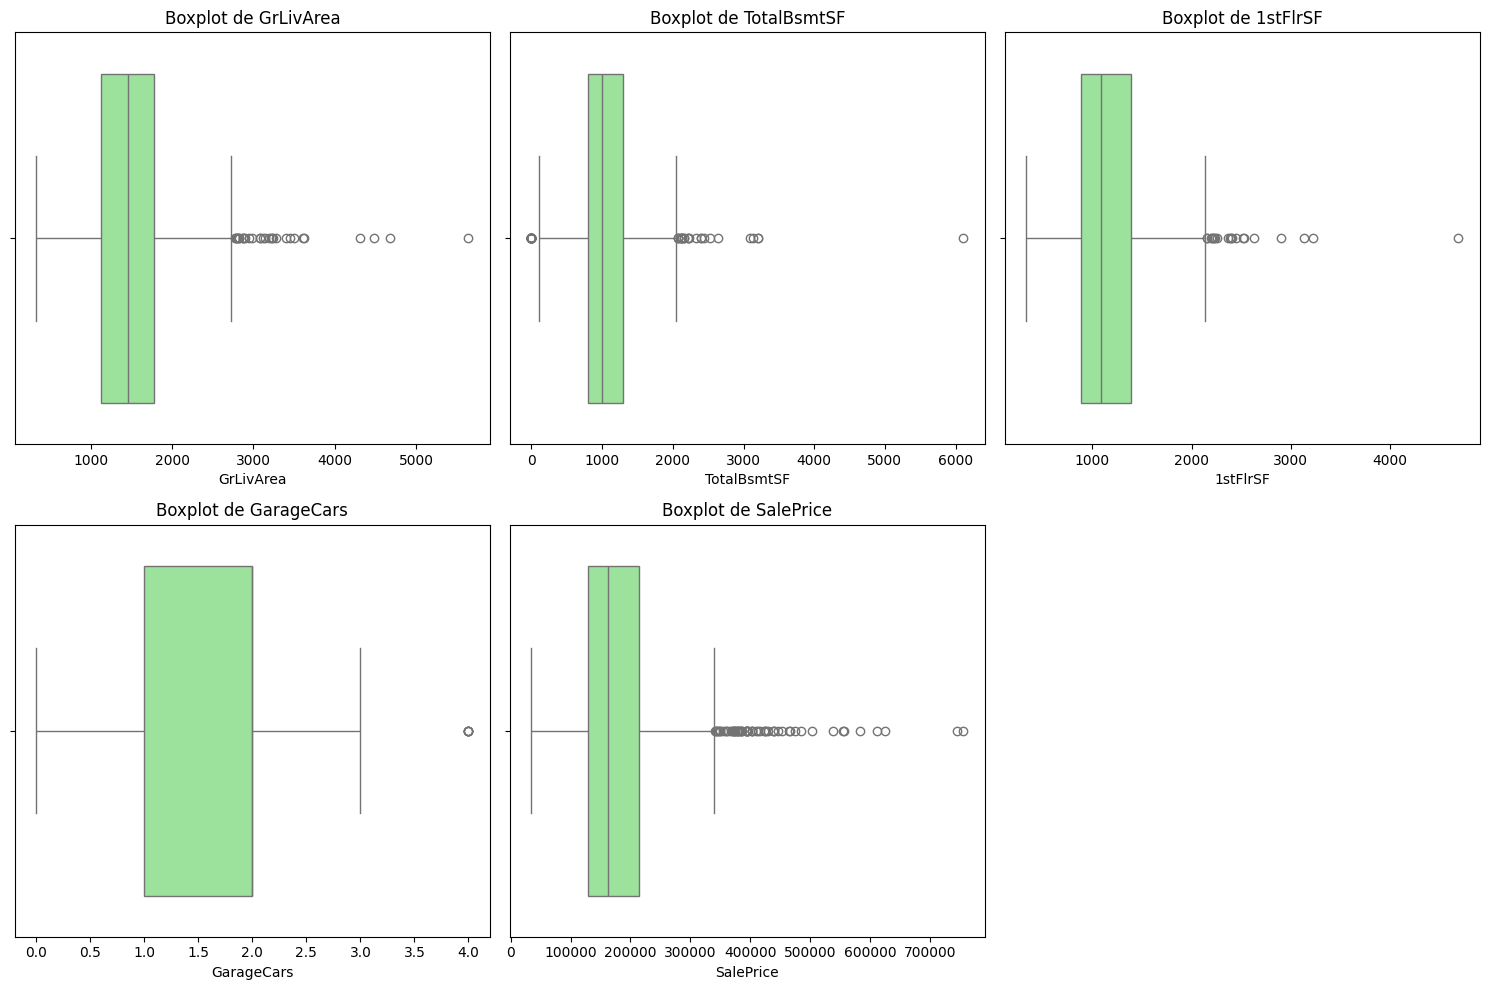

In [52]:
cols_outliers = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'SalePrice']

plt.figure(figsize = (15, 10))

for i, col in enumerate(cols_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data = train_data, x = col, color = 'lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()